In [15]:
#1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [16]:
#2. Load Dataset (Corrected)
#Load SECOND sheet (actual dataset)

df = pd.read_excel("heart_disease.xlsx", sheet_name=1)

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [17]:
#3. Check Missing Values

df.isnull().sum()

#Remove missing values if any

df = df.dropna()

In [18]:
#4. Encoding Categorical Variables

le = LabelEncoder()

# Explicitly convert 'exang' column to string type to ensure uniformity for LabelEncoder
df['exang'] = df['exang'].astype(str)

categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [19]:
#5. Define Features and Target

X = df.drop("num", axis=1)
y = df["num"]

In [20]:
#6. Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

In [21]:
#7. Train Decision Tree Model

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [23]:
#8. Evaluation
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob, multi_class='ovr'))

Accuracy: 0.5823529411764706
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        80
           1       0.40      0.59      0.48        41
           2       0.46      0.43      0.44        14
           3       0.29      0.15      0.20        27
           4       0.67      0.25      0.36         8

    accuracy                           0.58       170
   macro avg       0.52      0.44      0.45       170
weighted avg       0.58      0.58      0.57       170

ROC-AUC: 0.6610652069739326


In [24]:
#9. Hyperparameter Tuning

param_grid = {
'max_depth': [3, 5, 10, None],
'min_samples_split': [2, 5, 10],
'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
param_grid,
cv=5)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Tuned Accuracy: 0.5588235294117647


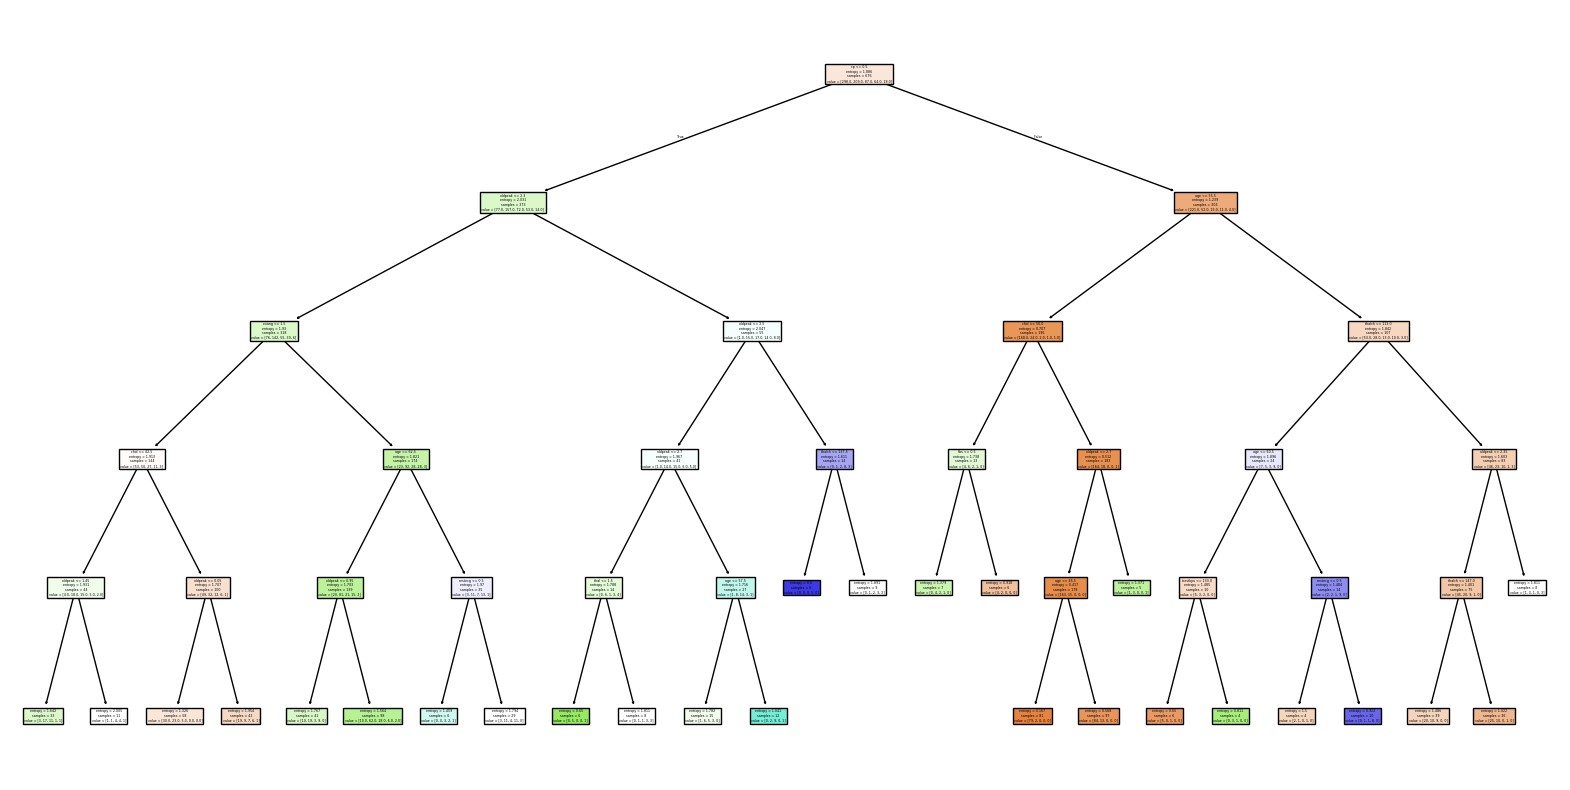

In [25]:
#10. Visualize Decision Tree

plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, filled=True)
plt.show()